In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading the data, Adding column names to it, and merging it as one

In [2]:
df1 = pd.read_csv('train_data.tsv', sep='\t')
df2 = pd.read_csv('test_data.tsv', sep='\t')
df3 = pd.read_csv('Validation_data.tsv', sep='\t')
print(df1.shape)
print(df2.shape)
print(df3.shape)
df1.columns = ['index', 'id', 'label', 'statement', 'subject', 'speaker', 'JobTitle', 'State', 'Party', 'BTC', 'FC', 'HT', 'MT', 'POF', 'context', 'justification']
df2.columns = ['index', 'id', 'label', 'statement', 'subject', 'speaker', 'JobTitle', 'State', 'Party', 'BTC', 'FC', 'HT', 'MT', 'POF', 'context', 'justification']
df3.columns = ['index', 'id', 'label', 'statement', 'subject', 'speaker', 'JobTitle', 'State', 'Party', 'BTC', 'FC', 'HT', 'MT', 'POF', 'context', 'justification']
df = pd.concat([df1, df2, df3], axis=0)
print(df.shape)
df.head()

(10239, 16)
(1266, 16)
(1283, 16)
(12788, 16)


,index,id,label,statement,subject,speaker,JobTitle,State,Party,BTC,FC,HT,MT,POF,context,justification
0,1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"Surovell said the decline of coal ""started whe..."
1,2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,Obama said he would have voted against the ame...
2,3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,The release may have a point that Mikulskis co...
3,4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,"Crist said that the economic ""turnaround start..."
4,5,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,"But Vos specifically used the word ""fired,"" wh..."


   index     id  label  statement  subject  speaker  JobTitle  State  Party  \
0      0   9967      2      12377     3056     2827       990     69      6   
1      1    310      3       2547     3424      210       732     20      6   
2      2   1027      1       2499     3666      309      1354     84     17   
3      3   8518      2      10303     2602      486      1354     13      6   
4      4  11777      5       9579     2751     2699      1117     79     20   

   BTC  FC  HT  MT  POF  context  justification  
0    0   0   1   1    0     1373           9523  
1   29  28  28  26    9      104           7031  
2    7  17   3   5   17     1657          10832  
3   15   9  17  16    2     3411           3318  
4    0   3   2   5    1      841           2099  


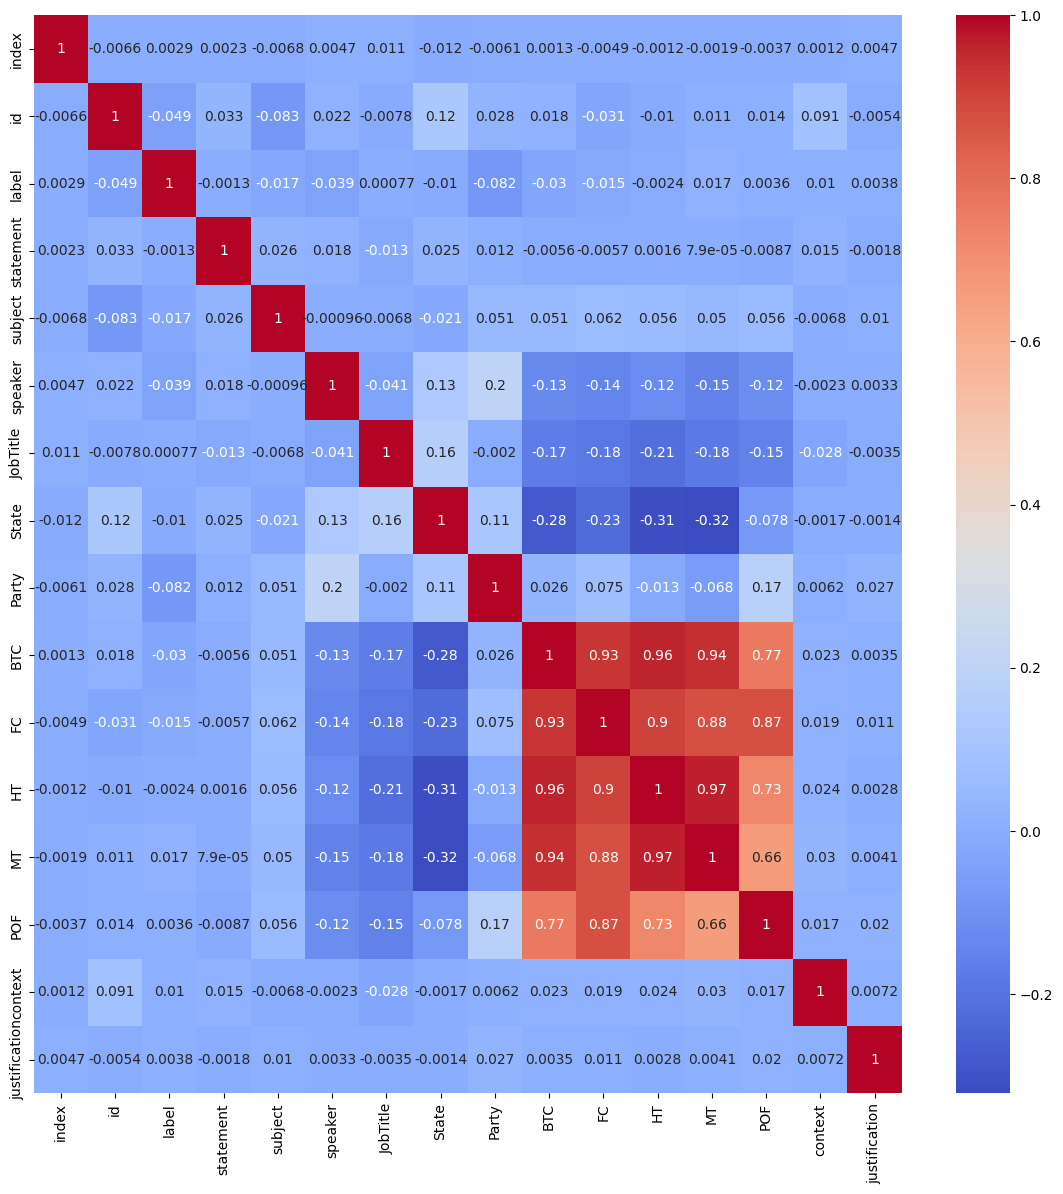

In [3]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
df_copy=df.copy()
# df_copy.drop(['statement','subject','justification','context'],axis=1,inplace=True)
df_copy['id'] = df_copy['id'].apply(lambda x: x[:-5])
df_copy['id'] = df_copy['id'].astype('int64')
le = LabelEncoder()

for f in df.columns:
    # convert all data to int considering it as categorical in nature
    df_copy[f] = le.fit_transform(df_copy[f])

print(df_copy.head())
corr_matrix = df_copy.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

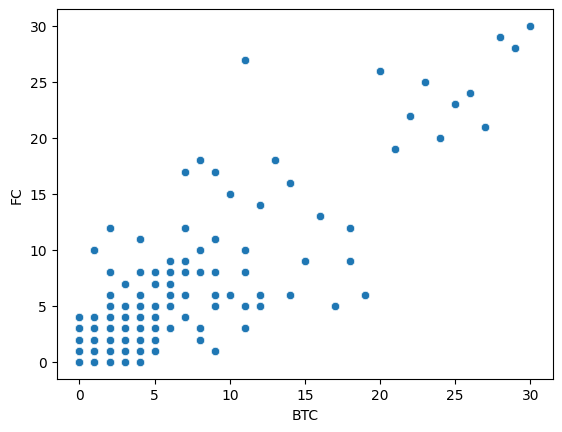

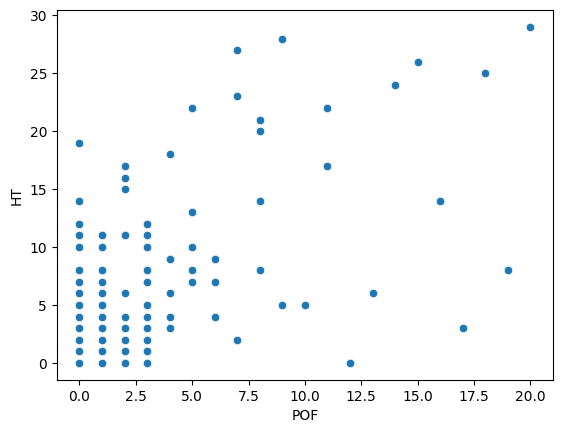

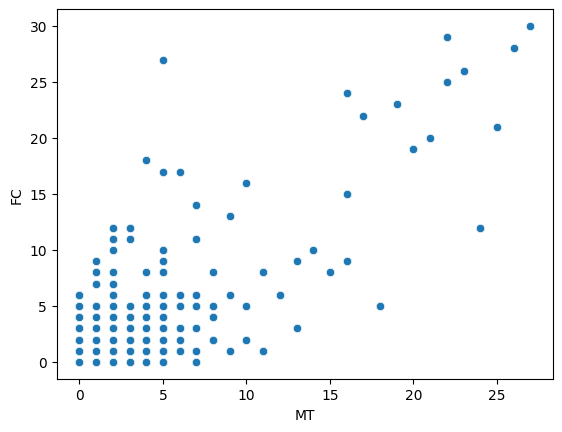

In [4]:
sns.scatterplot(x='BTC',y='FC',data=df_copy)
plt.show()
sns.scatterplot(x='POF',y='HT',data=df_copy)
plt.show()
sns.scatterplot(x='MT',y='FC',data=df_copy)
plt.show()

Dropping Correlated Values

In [5]:
# as we see above through heatmap and scatterplot, all these counts are correlated to each other highly so we drop them
# we also dont need index, id for the model
df = df.drop(['index', 'id', 'BTC', 'FC', 'HT', 'MT', 'POF'], axis=1)
df.head()

,label,statement,subject,speaker,JobTitle,State,Party,context,justification
0,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,a floor speech.,"Surovell said the decline of coal ""started whe..."
1,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,Denver,Obama said he would have voted against the ame...
2,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,a news release,The release may have a point that Mikulskis co...
3,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,an interview on CNN,"Crist said that the economic ""turnaround start..."
4,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,a an online opinion-piece,"But Vos specifically used the word ""fired,"" wh..."


Checking for more columns to drop

In [6]:
print("Number of missing values in each column:")
print(df.isnull().sum())

Number of missing values in each column:
label               0
statement           0
subject             2
speaker             2
JobTitle         3568
State            2751
Party               2
context           131
justification      97
dtype: int64


Dropping more columns

In [7]:
# as we can see above Jobtitle, State, context, justification have a lot of null values so we drop the column
df = df.drop(['JobTitle', 'State', 'context', 'justification'], axis=1)
df.head()

,label,statement,subject,speaker,Party
0,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,democrat
1,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,democrat
2,false,Health care reform legislation is likely to ma...,health-care,blog-posting,none
3,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,democrat
4,true,The Chicago Bears have had more starting quart...,education,robin-vos,republican


Converting data into binary classification

In [8]:
df['label'] = df['label'].map({'true': 1, 'half-true': 1, 'mostly-true': 1, 'false': 0, 'pants-fire': 0, 'barely-true': 0})
df.head()

,label,statement,subject,speaker,Party
0,1,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,democrat
1,1,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,democrat
2,0,Health care reform legislation is likely to ma...,health-care,blog-posting,none
3,1,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,democrat
4,1,The Chicago Bears have had more starting quart...,education,robin-vos,republican


Merge the statement and subject columns into one column for analysis

In [9]:
df['text'] = df['subject'] + ' ' + df['statement']
df = df.drop(['subject', 'statement'], axis=1)
df.head()

,label,speaker,Party,text
0,1,scott-surovell,democrat,"energy,history,job-accomplishments When did th..."
1,1,barack-obama,democrat,foreign-policy Hillary Clinton agrees with Joh...
2,0,blog-posting,none,health-care Health care reform legislation is ...
3,1,charlie-crist,democrat,"economy,jobs The economic turnaround started a..."
4,1,robin-vos,republican,education The Chicago Bears have had more star...


Dropping missing values rows

In [10]:
print("Number of missing values in each column:")
print(df.isnull().sum())
print("We drop the missing values")
df = df.dropna()
print("The shape of the dataset is now: ", df.shape)

Number of missing values in each column:
label      0
speaker    2
Party      2
text       2
dtype: int64
We drop the missing values
The shape of the dataset is now:  (12786, 4)


Converting data into lowercase

In [11]:
df = df.apply(lambda x: x.astype(str).str.lower())
print(df.head())

  label         speaker       Party  \
0     1  scott-surovell    democrat   
1     1    barack-obama    democrat   
2     0    blog-posting        none   
3     1   charlie-crist    democrat   
4     1       robin-vos  republican   

                                                text  
0  energy,history,job-accomplishments when did th...  
1  foreign-policy hillary clinton agrees with joh...  
2  health-care health care reform legislation is ...  
3  economy,jobs the economic turnaround started a...  
4  education the chicago bears have had more star...  


NLP Techniques Start From Here

1. Text Preprocessing

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.1 Noise Removal

In [12]:
# 1.1.1 Removing punctuations except comma, any links and any extra white spaces
df['text'] = df['text'].str.replace('[^\w\s,]', '')
df['text'] = df['text'].str.replace('http\S+|www.\S+', '', case=False)
df['text'] = df['text'].str.replace(' ,', ',')
df['text'] = df['text'].str.replace(', ', ',')

In [13]:
df.head()

,label,speaker,Party,text
0,1,scott-surovell,democrat,"energy,history,job-accomplishments when did th..."
1,1,barack-obama,democrat,foreign-policy hillary clinton agrees with joh...
2,0,blog-posting,none,health-care health care reform legislation is ...
3,1,charlie-crist,democrat,"economy,jobs the economic turnaround started a..."
4,1,robin-vos,republican,education the chicago bears have had more star...


In [14]:
# 1.1.2 Removing Stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: [item for item in x.split(' ') if item not in stop])
print(df.head())

  label         speaker       Party  \
0     1  scott-surovell    democrat   
1     1    barack-obama    democrat   
2     0    blog-posting        none   
3     1   charlie-crist    democrat   
4     1       robin-vos  republican   

                                                text  
0  [energy,history,job-accomplishments, decline, ...  
1  [foreign-policy, hillary, clinton, agrees, joh...  
2  [health-care, health, care, reform, legislatio...  
3  [economy,jobs, economic, turnaround, started, ...  
4  [education, chicago, bears, starting, quarterb...  


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.2 Lexicon Normalization

In [15]:
# 1.2.1 Tokenization of text column
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
df['text'] = df['text'].apply(lambda x: tokenizer.tokenize(str(x)))
print(df.head())

  label         speaker       Party  \
0     1  scott-surovell    democrat   
1     1    barack-obama    democrat   
2     0    blog-posting        none   
3     1   charlie-crist    democrat   
4     1       robin-vos  republican   

                                                text  
0  [energy, history, job, accomplishments, declin...  
1  [foreign, policy, hillary, clinton, agrees, jo...  
2  [health, care, health, care, reform, legislati...  
3  [economy, jobs, economic, turnaround, started,...  
4  [education, chicago, bears, starting, quarterb...  


In [16]:
# 1.2.2 Lemmatization of text column
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
print(df.head())

  label         speaker       Party  \
0     1  scott-surovell    democrat   
1     1    barack-obama    democrat   
2     0    blog-posting        none   
3     1   charlie-crist    democrat   
4     1       robin-vos  republican   

                                                text  
0  [energy, history, job, accomplishment, decline...  
1  [foreign, policy, hillary, clinton, agrees, jo...  
2  [health, care, health, care, reform, legislati...  
3  [economy, job, economic, turnaround, started, ...  
4  [education, chicago, bear, starting, quarterba...  


In [17]:
# # 1.2.3 Stemming of text column
# from nltk.stem.porter import PorterStemmer
# stem = PorterStemmer()
# df['text'] = df['text'].apply(lambda x: [stem.stem(y) for y in x])
# print(df.head())

Joining text column into a string for vectorization 

In [18]:
df['text'] = df['text'].apply(lambda x: ' '.join(x))

Visualization of data 

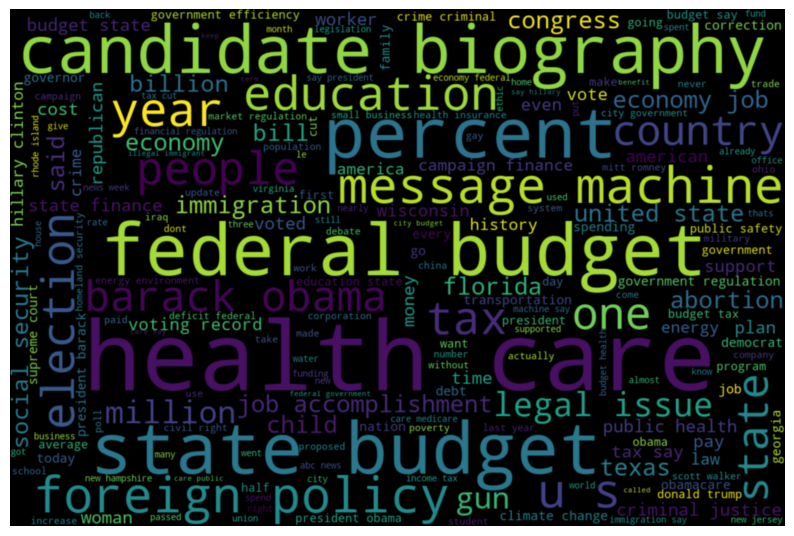

In [19]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in df['text']])
wordcloud = WordCloud(width=1200, height=800, random_state=1000000007, max_font_size=150).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bicubic")
plt.axis('off')
plt.show()

Using TFIDF and BOW for vectorization

In [20]:
def to_vector_Tfidf(df, col):
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer(max_features=2000)
    vectorizer.fit(df[col])
    return vectorizer.transform(df[col])

def to_vector_bow(df, col):
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer(max_features=2000)
    vectorizer.fit(df[col])
    return vectorizer.transform(df[col])

In [32]:
text_vector_tfidf = to_vector_Tfidf(df, 'text')
print("Shape of the tfidf vector: ", text_vector_tfidf.shape)
text_vector_bow = to_vector_bow(df, 'text')
print("Shape of the text vector for bow vectorization: ", text_vector_bow.shape)


Shape of the tfidf vector:  (12786, 2000)
Shape of the text vector for bow vectorization:  (12786, 2000)


# running pca

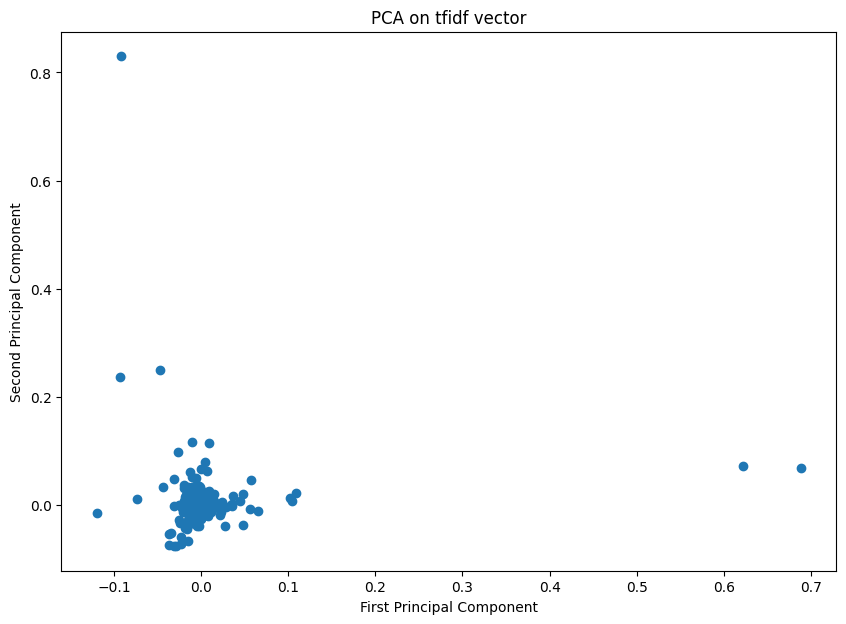

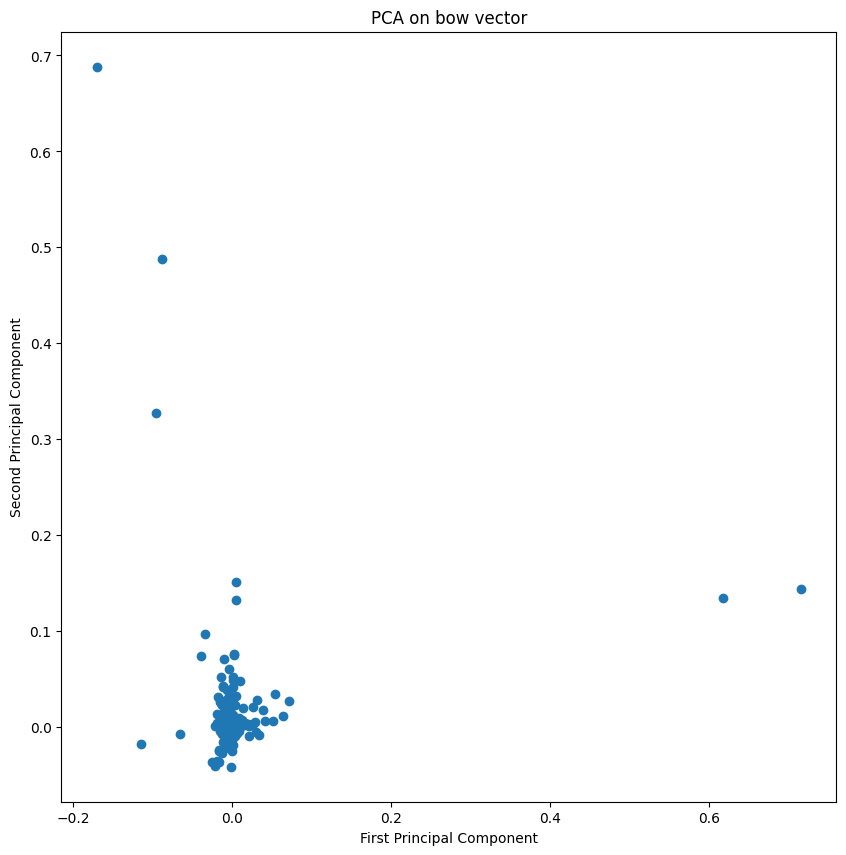

In [39]:
text_vector_tfidf_copy=text_vector_tfidf.copy()
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(text_vector_tfidf_copy.toarray())
plt.figure(figsize=(10, 7))
# pcadf = pd.DataFrame(pca.components_[0:2])
# sns.pairplot(pcadf);
plt.scatter(pca.components_[0], pca.components_[1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA on tfidf vector')
plt.show()

text_vector_bow_copy=text_vector_bow.copy()
pca = PCA(n_components=2)
pca.fit_transform(text_vector_bow_copy.toarray())
plt.figure(figsize=(10, 10))
plt.scatter(pca.components_[0], pca.components_[1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA on bow vector')
plt.show()

C:\Users\abdus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 12786 samples in 0.033s...
[t-SNE] Computed neighbors for 12786 samples in 5.948s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12786
[t-SNE] Computed conditional probabilities for sample 2000 / 12786
[t-SNE] Computed conditional probabilities for sample 3000 / 12786
[t-SNE] Computed conditional probabilities for sample 4000 / 12786
[t-SNE] Computed conditional probabilities for sample 5000 / 12786
[t-SNE] Computed conditional probabilities for sample 6000 / 12786
[t-SNE] Computed conditional probabilities for sample 7000 / 12786
[t-SNE] Computed conditional probabilities for sample 8000 / 12786
[t-SNE] Computed conditional probabilities for sample 9000 / 12786
[t-SNE] Computed conditional probabilities for sample 10000 / 12786
[t-SNE] Computed conditional probabilities for sample 11000 / 12786
[t-SNE] Computed conditional probabilities for sample 12000 / 12786
[t-SNE] Computed conditional probabilities for sa

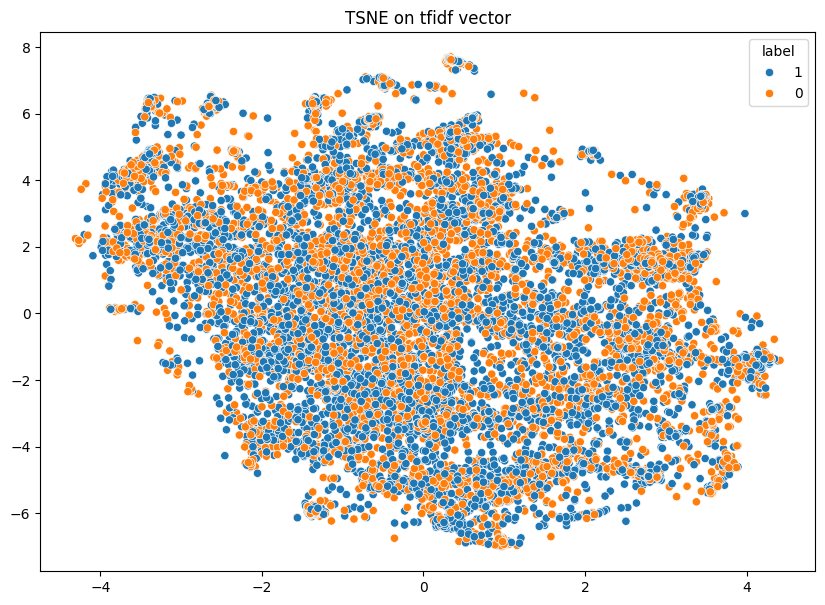

In [40]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_text_vector_tfidf_tsne_copy=text_vector_tfidf.copy()
tsne_text_vector_tfidf_tsne_copy = tsne.fit_transform(tsne_text_vector_tfidf_tsne_copy.toarray())
plt.figure(figsize=(10, 7))
import seaborn as sns
sns.scatterplot(x=tsne_text_vector_tfidf_tsne_copy[:,0], y=tsne_text_vector_tfidf_tsne_copy[:,1], hue=df['label'])
plt.title('TSNE on tfidf vector')
plt.show()

C:\Users\abdus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 12786 samples in 0.012s...
[t-SNE] Computed neighbors for 12786 samples in 7.848s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12786
[t-SNE] Computed conditional probabilities for sample 2000 / 12786
[t-SNE] Computed conditional probabilities for sample 3000 / 12786
[t-SNE] Computed conditional probabilities for sample 4000 / 12786
[t-SNE] Computed conditional probabilities for sample 5000 / 12786
[t-SNE] Computed conditional probabilities for sample 6000 / 12786
[t-SNE] Computed conditional probabilities for sample 7000 / 12786
[t-SNE] Computed conditional probabilities for sample 8000 / 12786
[t-SNE] Computed conditional probabilities for sample 9000 / 12786
[t-SNE] Computed conditional probabilities for sample 10000 / 12786
[t-SNE] Computed conditional probabilities for sample 11000 / 12786
[t-SNE] Computed conditional probabilities for sample 12000 / 12786
[t-SNE] Computed conditional probabilities for sa

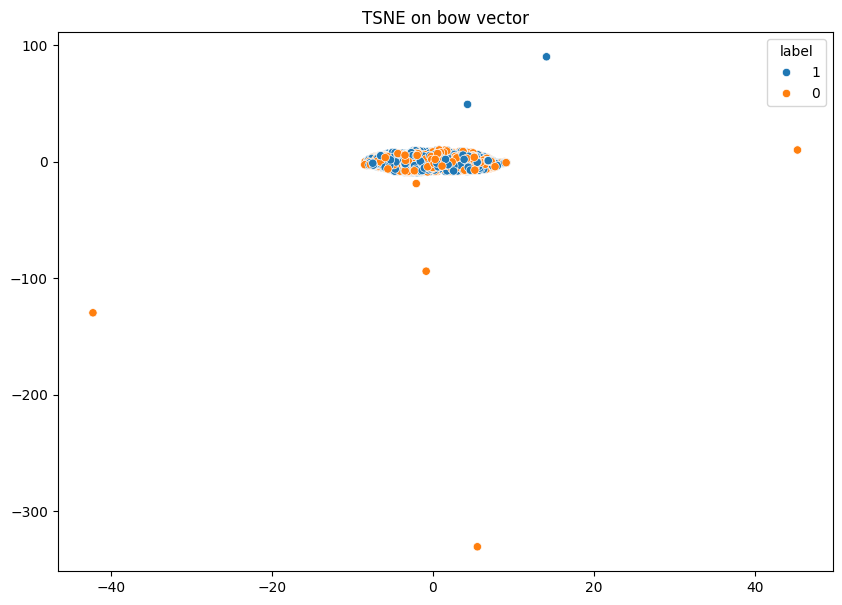

In [41]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_text_vector_bow_tsne_copy=text_vector_bow.copy()
tsne_text_vector_bow_tsne_copy = tsne.fit_transform(tsne_text_vector_bow_tsne_copy.toarray())
plt.figure(figsize=(10, 7))
sns.scatterplot(x=tsne_text_vector_bow_tsne_copy[:,0], y=tsne_text_vector_bow_tsne_copy[:,1], hue=df['label'])
plt.title('TSNE on bow vector')
plt.show()

In [42]:
text_vector_tfidf = text_vector_tfidf.toarray()
text_vector_bow = text_vector_bow.toarray()

In [43]:
label_vector = df['label'].values
speaker_vector = df['speaker'].values
party_vector = df['Party'].values
label_vector = label_vector.reshape(-1, 1)
speaker_vector = speaker_vector.reshape(-1, 1)
party_vector = party_vector.reshape(-1, 1)

In [44]:
dataF1 = np.concatenate((text_vector_tfidf, label_vector), axis=1)
dataF2 = np.concatenate((text_vector_bow, label_vector), axis=1)
dataF3 = np.concatenate((text_vector_tfidf, label_vector, speaker_vector, party_vector), axis=1)
dataF4 = np.concatenate((text_vector_bow, label_vector, speaker_vector, party_vector), axis=1)
print(dataF1.shape)
print(dataF2.shape)
print(dataF3.shape)
print(dataF4.shape)

(12786, 2001)
(12786, 2001)
(12786, 2003)
(12786, 2003)


In [45]:
dataF1=pd.DataFrame(dataF1)
dataF2=pd.DataFrame(dataF2)
dataF3=pd.DataFrame(dataF3)
dataF4=pd.DataFrame(dataF4)
print(dataF1.head())

  0         1    2    3    4    5    6    7    8    9     ... 1991 1992 1993  \
0  0.0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4  0.0  0.213566  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

  1994 1995 1996 1997 1998 1999 2000  
0  0.0  0.0  0.0  0.0  0.0  0.0    1  
1  0.0  0.0  0.0  0.0  0.0  0.0    1  
2  0.0  0.0  0.0  0.0  0.0  0.0    0  
3  0.0  0.0  0.0  0.0  0.0  0.0    1  
4  0.0  0.0  0.0  0.0  0.0  0.0    1  

[5 rows x 2001 columns]


In [46]:
for i in range(2000):
    dataF1.rename(columns={i: 'tfidf'+str(i)}, inplace=True)
    dataF2.rename(columns={i: 'bow'+str(i)}, inplace=True)
    dataF3.rename(columns={i: 'tfidf'+str(i)}, inplace=True)
    dataF4.rename(columns={i: 'bow'+str(i)}, inplace=True)
dataF1.rename(columns={2000: 'label'}, inplace=True)
dataF2.rename(columns={2000: 'label'}, inplace=True)
dataF3.rename(columns={2000: 'label'}, inplace=True)
dataF4.rename(columns={2000: 'label'}, inplace=True)
dataF3.rename(columns={2001: 'speaker'}, inplace=True)
dataF4.rename(columns={2001: 'speaker'}, inplace=True)
dataF3.rename(columns={2002: 'party'}, inplace=True)
dataF4.rename(columns={2002: 'party'}, inplace=True)

In [47]:
from sklearn.preprocessing import LabelEncoder
le3=LabelEncoder()
le4=LabelEncoder()
dataF3['speaker']=le3.fit_transform(dataF3['speaker'])
dataF4['speaker']=le4.fit_transform(dataF4['speaker'])
dataF3['party']=le3.fit_transform(dataF3['party'])
dataF4['party']=le4.fit_transform(dataF4['party'])

In [48]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(dataF1.drop('label', axis=1), dataF1['label'], test_size=0.2, random_state=0)
X_val1, X_test1, y_val1, y_test1 = train_test_split(X_test1, y_test1, test_size=0.5, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(dataF2.drop('label', axis=1), dataF2['label'], test_size=0.2, random_state=0)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_test2, y_test2, test_size=0.5, random_state=0)
X_train3, X_test3, y_train3, y_test3 = train_test_split(dataF3.drop('label', axis=1), dataF3['label'], test_size=0.2, random_state=0)
X_val3, X_test3, y_val3, y_test3 = train_test_split(X_test3, y_test3, test_size=0.5, random_state=0)
X_train4, X_test4, y_train4, y_test4 = train_test_split(dataF4.drop('label', axis=1), dataF4['label'], test_size=0.2, random_state=0)
X_val4, X_test4, y_val4, y_test4 = train_test_split(X_test4, y_test4, test_size=0.5, random_state=0)

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
print(dataF1.head())
print(dataF3.head())

  tfidf0    tfidf1 tfidf2 tfidf3 tfidf4 tfidf5 tfidf6 tfidf7 tfidf8 tfidf9  \
0    0.0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0  0.213566    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   ... tfidf1991 tfidf1992 tfidf1993 tfidf1994 tfidf1995 tfidf1996 tfidf1997  \
0  ...       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1  ...       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2  ...       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3  ...       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4  ...       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

  tfidf1998 tfidf1999 label  
0       0.0       0.

# grid search and learning curves 

In [54]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [89]:
def gauss_grid_learn(X_train,y_train,X_val,y_val):
    gnb=GaussianNB()
    param_grid = {'var_smoothing': np.logspace(0,-9, num=10)}
    grid_search = GridSearchCV(gnb, param_grid, cv=3,refit=True,n_jobs=-1,scoring='accuracy',verbose=1)
    grid_search.fit(X_train,y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print("Accuracy: ",accuracy_score(y_val,grid_search.predict(X_val)))
    print(classification_report(y_val,grid_search.predict(X_val)))
    train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1, verbose=1,shuffle=True)
    train_mean=np.mean(train_scores,axis=1)
    train_std=np.std(train_scores,axis=1)
    test_mean=np.mean(test_scores,axis=1)
    test_std=np.std(test_scores,axis=1)
    plt.plot(train_sizes,train_mean,color='blue',marker='o',label='training accuracy')
    plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
    plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',label='validation accuracy')
    plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
    plt.title("Learning Curve for Gaussian Naive Bayes")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc='best')
    plt.show()

def logistic_grid_learn(X_train,y_train,X_val,y_val):
    logreg=LogisticRegression(random_state=0,max_iter=20000)
    param_grid = {'C': [0.1, 1, 10],'tol': [0.0001, 0.001, 1, 10]}
    grid_search = GridSearchCV(logreg, param_grid, cv=3,refit=True,n_jobs=-1,scoring='accuracy',verbose=1)
    grid_search.fit(X_train,y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print("Accuracy: ",accuracy_score(y_val,grid_search.predict(X_val)))
    print(classification_report(y_val,grid_search.predict(X_val)))
    train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1, verbose=1,shuffle=True)
    train_mean=np.mean(train_scores,axis=1)
    train_std=np.std(train_scores,axis=1)
    test_mean=np.mean(test_scores,axis=1)
    test_std=np.std(test_scores,axis=1)
    plt.plot(train_sizes,train_mean,color='blue',marker='o',label='training accuracy')
    plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
    plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',label='validation accuracy')
    plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
    plt.title("Learning Curve for Logistic Regression")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc='best')
    plt.show()

def decision_grid_learn(X_train,y_train,X_val,y_val):
    dtree=DecisionTreeClassifier(random_state=0)
    param_grid = {'criterion':["gini","entropy"],'max_depth': [10, 50, 100, None]}
    grid_search = GridSearchCV(dtree, param_grid, cv=3,refit=True,n_jobs=-1,scoring='accuracy',verbose=1)
    grid_search.fit(X_train,y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print("Accuracy: ",accuracy_score(y_val,grid_search.predict(X_val)))
    print(classification_report(y_val,grid_search.predict(X_val)))
    train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1, verbose=1,shuffle=True)
    train_mean=np.mean(train_scores,axis=1)
    train_std=np.std(train_scores,axis=1)
    test_mean=np.mean(test_scores,axis=1)
    test_std=np.std(test_scores,axis=1)
    plt.plot(train_sizes,train_mean,color='blue',marker='o',label='training accuracy')
    plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
    plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',label='validation accuracy')
    plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
    plt.title("Learning Curve for Decision Tree")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc='best')
    plt.show()

def random_grid_learn(X_train,y_train,X_val,y_val):
    rtree=RandomForestClassifier(random_state=0)
    param_grid = {'max_depth': [10,50, 100, 500, 1000, 2000, None],'criterion': ['gini', 'entropy']}
    grid_search = GridSearchCV(rtree, param_grid, cv=6,refit=True,n_jobs=-1,scoring='accuracy',verbose=1)
    grid_search.fit(X_train,y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print("Accuracy: ",accuracy_score(y_val,grid_search.predict(X_val)))
    print(classification_report(y_val,grid_search.predict(X_val)))
    train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X_train, y_train, cv=6, scoring='accuracy', n_jobs=-1, verbose=1,shuffle=True)
    train_mean=np.mean(train_scores,axis=1)
    train_std=np.std(train_scores,axis=1)
    test_mean=np.mean(test_scores,axis=1)
    test_std=np.std(test_scores,axis=1)
    plt.plot(train_sizes,train_mean,color='blue',marker='o',label='training accuracy')
    plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
    plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',label='validation accuracy')
    plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
    plt.title("Learning Curve for Random Forest")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc='best')
    plt.show()

def ada_grid_learn(X_train,y_train,X_val,y_val):
    ada=AdaBoostClassifier(random_state=0)
    param_grid = {'n_estimators': [10, 50],'learning_rate': [0.1,0.5,1,2]}
    grid_search = GridSearchCV(ada, param_grid, cv=3,refit=True,n_jobs=-1,scoring='accuracy',verbose=1)
    grid_search.fit(X_train,y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print("Accuracy: ",accuracy_score(y_val,grid_search.predict(X_val)))
    print(classification_report(y_val,grid_search.predict(X_val)))
    train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1, verbose=1,shuffle=True)
    train_mean=np.mean(train_scores,axis=1)
    train_std=np.std(train_scores,axis=1)
    test_mean=np.mean(test_scores,axis=1)
    test_std=np.std(test_scores,axis=1)
    plt.plot(train_sizes,train_mean,color='blue',marker='o',label='training accuracy')
    plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
    plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',label='validation accuracy')
    plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
    plt.title("Learning Curve for AdaBoost")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc='best')
    plt.show()

def svm_grid_learn(X_train,y_train,X_val,y_val):
    svm=SVC(random_state=0)
    param_grid={'C':[0.1,1,100],'kernel':['rbf','linear']}
    grid_search = GridSearchCV(svm, param_grid, cv=3,refit=True,n_jobs=-1,scoring='accuracy',verbose=1)
    grid_search.fit(X_train,y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print("Accuracy: ",accuracy_score(y_val,grid_search.predict(X_val)))
    print(classification_report(y_val,grid_search.predict(X_val)))
    train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1, verbose=1,shuffle=True)
    train_mean=np.mean(train_scores,axis=1)
    train_std=np.std(train_scores,axis=1)
    test_mean=np.mean(test_scores,axis=1)
    test_std=np.std(test_scores,axis=1)
    plt.plot(train_sizes,train_mean,color='blue',marker='o',label='training accuracy')
    plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
    plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',label='validation accuracy')
    plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
    plt.title("Learning Curve for SVM")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc='best')
    plt.show()

def mlp_grid_learn(X_train,y_train,X_val,y_val):
    mlp=MLPClassifier(random_state=0,early_stopping=True,validation_fraction=0.2)
    param_grid={'activation':["relu","logistic"]}
    grid_search = GridSearchCV(mlp, param_grid, cv=3,refit=True,n_jobs=-1,scoring='accuracy',verbose=1)
    grid_search.fit(X_train,y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print("Accuracy: ",accuracy_score(y_val,grid_search.predict(X_val)))
    print(classification_report(y_val,grid_search.predict(X_val)))
    plt.plot(grid_search.best_estimator_.loss_curve_)
    plt.plot(grid_search.best_estimator_.validation_scores_)
    plt.title("Loss Curve and Validation Score")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(["Loss Curve","Validation Score"])
    plt.show()

def mlp_pca_grid_learn(X_train,y_train,X_val,y_val):
    X_train_copy=X_train.copy()
    X_val_copy=X_val.copy()
    y_train_copy=y_train.copy()
    y_val_copy=y_val.copy()
    pca=PCA()
    X_train_copy=pca.fit_transform(X_train_copy)
    X_val_copy=pca.transform(X_val_copy)
    mlp=MLPClassifier(random_state=0,early_stopping=True,validation_fraction=0.2)
    param_grid={'activation':["relu","logistic"]}
    grid_search = GridSearchCV(mlp, param_grid, cv=6,refit=True,n_jobs=-1,scoring='accuracy',verbose=1)
    grid_search.fit(X_train_copy,y_train_copy)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print("Accuracy: ",accuracy_score(y_val_copy,grid_search.predict(X_val_copy)))
    print(classification_report(y_val_copy,grid_search.predict(X_val_copy)))
    plt.plot(grid_search.best_estimator_.loss_curve_)
    plt.plot(grid_search.best_estimator_.validation_scores_)
    plt.title("Loss Curve and Validation Score")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(["Loss Curve","Validation Score"])
    plt.show()

def mlp_tsne_grid_learn(X_train,y_train,X_val,y_val):
    X_train_copy=X_train.copy()
    X_val_copy=X_val.copy()
    y_train_copy=y_train.copy()
    y_val_copy=y_val.copy()
    tsne=TSNE(n_components=2)
    X=np.vstack((X_train_copy,X_val_copy))
    X=tsne.fit_transform(X)
    X_train_copy=X[:len(X_train_copy)]
    X_val_copy=X[len(X_train_copy):]
    mlp=MLPClassifier(random_state=0,early_stopping=True,validation_fraction=0.2)
    param_grid={'activation':["relu","logistic"]}
    grid_search = GridSearchCV(mlp, param_grid, cv=3,refit=True,n_jobs=-1,scoring='accuracy',verbose=1)
    grid_search.fit(X_train_copy,y_train_copy)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print("Accuracy: ",accuracy_score(y_val_copy,grid_search.predict(X_val_copy)))
    print(classification_report(y_val_copy,grid_search.predict(X_val_copy)))
    plt.plot(grid_search.best_estimator_.loss_curve_)
    plt.plot(grid_search.best_estimator_.validation_scores_)
    plt.title("Loss Curve and Validation Score")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(["Loss Curve","Validation Score"])
    plt.show()


Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'var_smoothing': 1.0}
0.6012923642121496
Accuracy:  0.5879593432369038
              precision    recall  f1-score   support

           0       0.51      0.49      0.50       542
           1       0.64      0.66      0.65       737

    accuracy                           0.59      1279
   macro avg       0.58      0.57      0.57      1279
weighted avg       0.59      0.59      0.59      1279

[learning_curve] Training set sizes: [ 681 2215 3749 5283 6818]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.3min finished


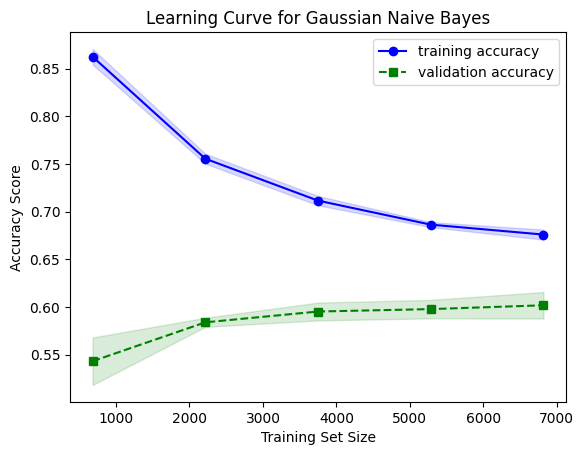

In [56]:
gauss_grid_learn(X_train1,y_train1,X_val1,y_val1)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'var_smoothing': 0.01}
0.5743065263102357
Accuracy:  0.5379202501954652
              precision    recall  f1-score   support

           0       0.47      0.70      0.56       542
           1       0.66      0.42      0.51       737

    accuracy                           0.54      1279
   macro avg       0.56      0.56      0.54      1279
weighted avg       0.58      0.54      0.53      1279

[learning_curve] Training set sizes: [ 681 2215 3749 5283 6818]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   22.4s finished


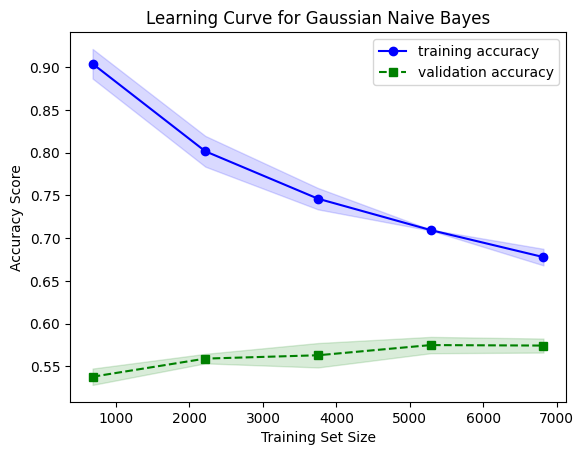

In [57]:
gauss_grid_learn(X_train2,y_train2,X_val2,y_val2)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'var_smoothing': 1e-08}
0.6184016376637427
Accuracy:  0.5887412040656763
              precision    recall  f1-score   support

           0       0.51      0.54      0.53       542
           1       0.65      0.62      0.64       737

    accuracy                           0.59      1279
   macro avg       0.58      0.58      0.58      1279
weighted avg       0.59      0.59      0.59      1279

[learning_curve] Training set sizes: [ 681 2215 3749 5283 6818]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.0min finished


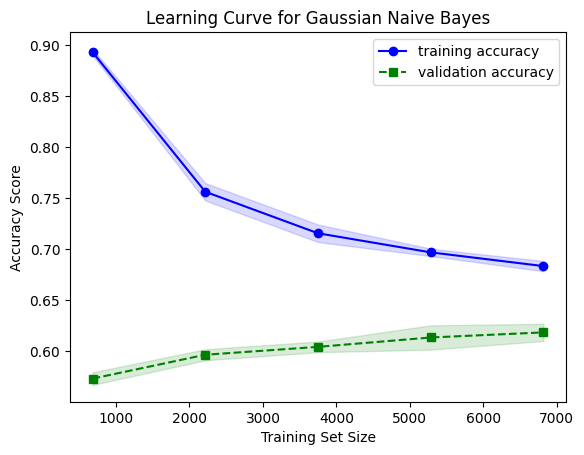

In [58]:
gauss_grid_learn(X_train3,y_train3,X_val3,y_val3)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'var_smoothing': 1e-09}
0.5693197840114447
Accuracy:  0.5332290852228303
              precision    recall  f1-score   support

           0       0.46      0.61      0.52       542
           1       0.62      0.48      0.54       737

    accuracy                           0.53      1279
   macro avg       0.54      0.54      0.53      1279
weighted avg       0.55      0.53      0.53      1279

[learning_curve] Training set sizes: [ 681 2215 3749 5283 6818]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   23.0s finished


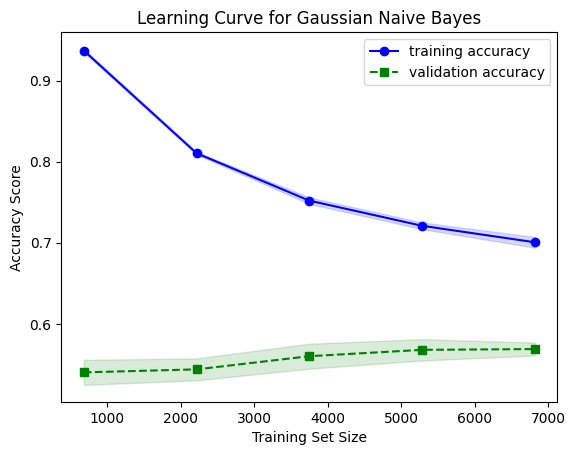

In [59]:
gauss_grid_learn(X_train4,y_train4,X_val4,y_val4)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'C': 1, 'tol': 0.001}
0.6117531162838178
Accuracy:  0.5887412040656763
              precision    recall  f1-score   support

           0       0.52      0.41      0.46       542
           1       0.62      0.72      0.67       737

    accuracy                           0.59      1279
   macro avg       0.57      0.56      0.56      1279
weighted avg       0.58      0.59      0.58      1279

[learning_curve] Training set sizes: [ 681 2215 3749 5283 6818]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.1min finished


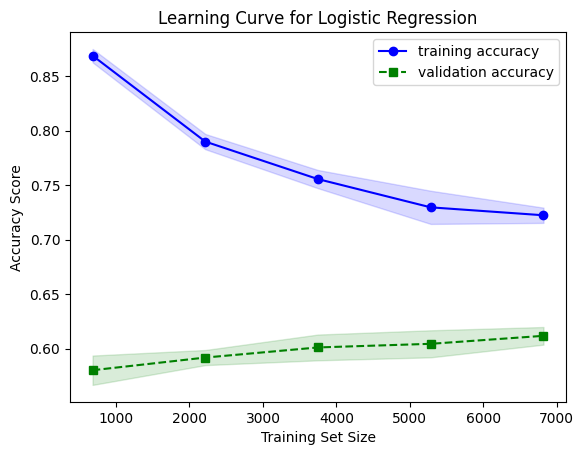

In [60]:
logistic_grid_learn(X_train1,y_train1,X_val1,y_val1)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'C': 0.1, 'tol': 0.0001}
0.6076467415475165
Accuracy:  0.5863956215793589
              precision    recall  f1-score   support

           0       0.52      0.41      0.46       542
           1       0.62      0.72      0.67       737

    accuracy                           0.59      1279
   macro avg       0.57      0.56      0.56      1279
weighted avg       0.58      0.59      0.58      1279

[learning_curve] Training set sizes: [ 681 2215 3749 5283 6818]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   21.7s finished


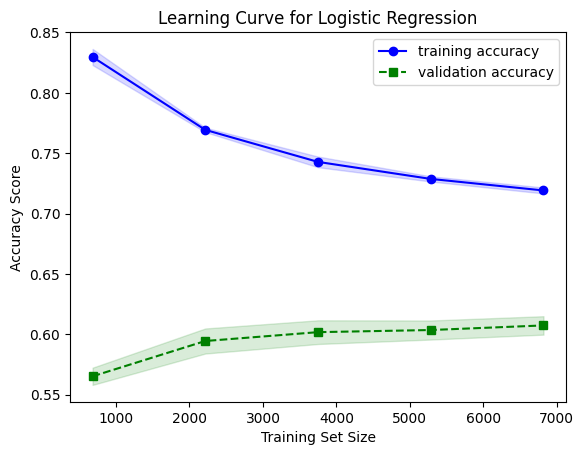

In [61]:
logistic_grid_learn(X_train2,y_train2,X_val2,y_val2)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'C': 0.1, 'tol': 0.0001}
0.6274934356672451
Accuracy:  0.6082877247849883
              precision    recall  f1-score   support

           0       0.55      0.41      0.47       542
           1       0.64      0.75      0.69       737

    accuracy                           0.61      1279
   macro avg       0.59      0.58      0.58      1279
weighted avg       0.60      0.61      0.60      1279

[learning_curve] Training set sizes: [ 681 2215 3749 5283 6818]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.3min finished


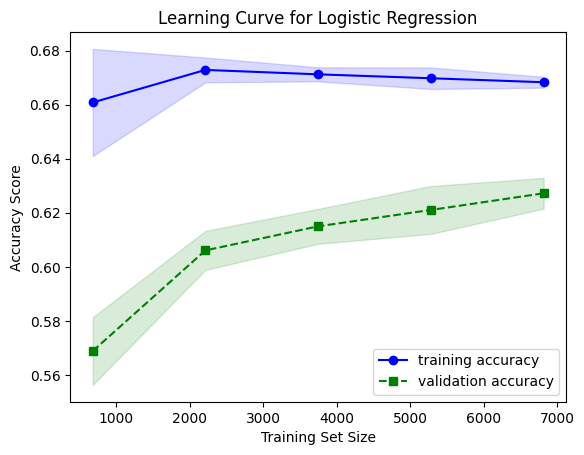

In [62]:
logistic_grid_learn(X_train3,y_train3,X_val3,y_val3)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'C': 0.1, 'tol': 0.0001}
0.620357388741836
Accuracy:  0.5973416731821736
              precision    recall  f1-score   support

           0       0.53      0.44      0.48       542
           1       0.63      0.71      0.67       737

    accuracy                           0.60      1279
   macro avg       0.58      0.58      0.58      1279
weighted avg       0.59      0.60      0.59      1279

[learning_curve] Training set sizes: [ 681 2215 3749 5283 6818]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.9min finished


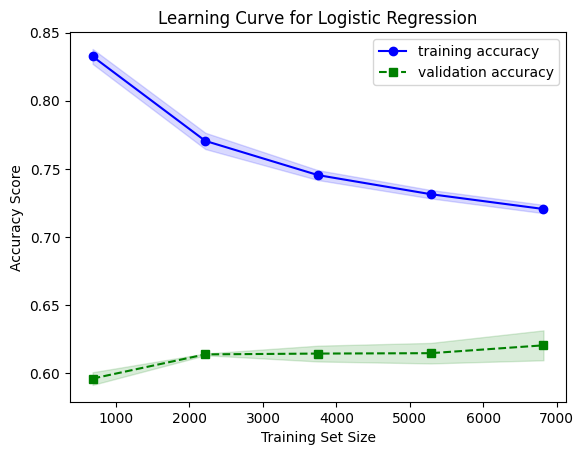

In [63]:
logistic_grid_learn(X_train4,y_train4,X_val4,y_val4)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'criterion': 'entropy', 'max_depth': 10}
0.5752836706469878
Accuracy:  0.5856137607505864
              precision    recall  f1-score   support

           0       0.54      0.14      0.22       542
           1       0.59      0.91      0.72       737

    accuracy                           0.59      1279
   macro avg       0.57      0.53      0.47      1279
weighted avg       0.57      0.59      0.51      1279

[learning_curve] Training set sizes: [ 681 2215 3749 5283 6818]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.2min finished


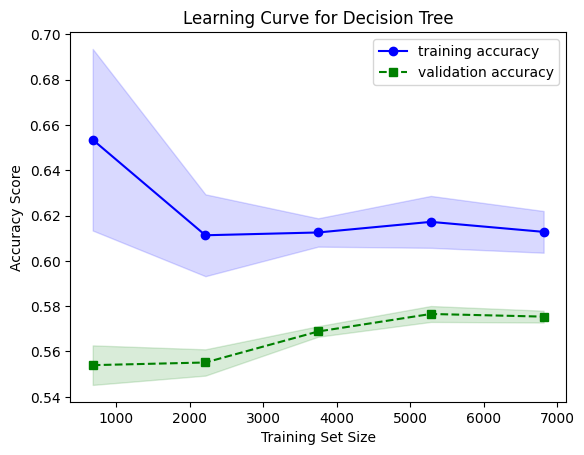

In [64]:
decision_grid_learn(X_train1,y_train1,X_val1,y_val1)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'criterion': 'gini', 'max_depth': 10}
0.5785097638445986
Accuracy:  0.5723221266614542
              precision    recall  f1-score   support

           0       0.49      0.20      0.29       542
           1       0.59      0.84      0.69       737

    accuracy                           0.57      1279
   macro avg       0.54      0.52      0.49      1279
weighted avg       0.55      0.57      0.52      1279

[learning_curve] Training set sizes: [ 681 2215 3749 5283 6818]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   26.5s finished


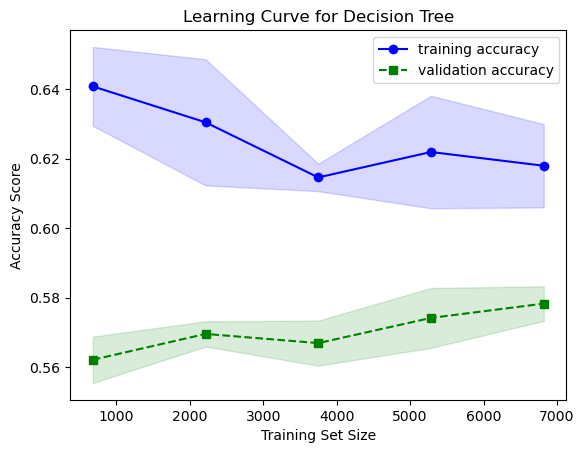

In [63]:
decision_grid_learn(X_train2,y_train2,X_val2,y_val2)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'criterion': 'entropy', 'max_depth': 10}
0.5845715455637956
Accuracy:  0.5731039874902267
              precision    recall  f1-score   support

           0       0.50      0.55      0.52       542
           1       0.64      0.59      0.61       737

    accuracy                           0.57      1279
   macro avg       0.57      0.57      0.57      1279
weighted avg       0.58      0.57      0.58      1279

[learning_curve] Training set sizes: [ 681 2215 3749 5283 6818]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.0min finished


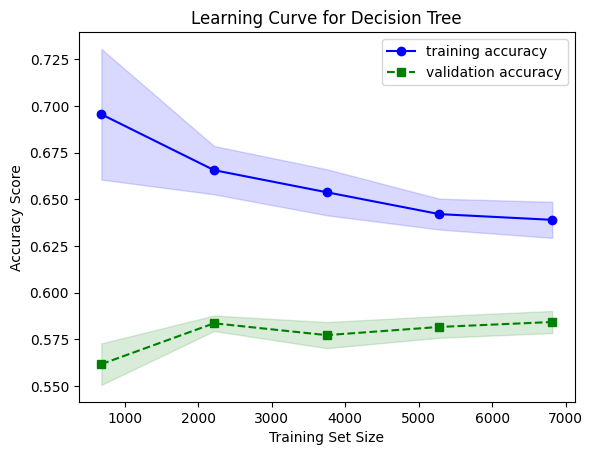

In [65]:
decision_grid_learn(X_train3,y_train3,X_val3,y_val3)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'criterion': 'gini', 'max_depth': 10}
0.5941529623585661
Accuracy:  0.5989053948397185
              precision    recall  f1-score   support

           0       0.53      0.53      0.53       542
           1       0.65      0.65      0.65       737

    accuracy                           0.60      1279
   macro avg       0.59      0.59      0.59      1279
weighted avg       0.60      0.60      0.60      1279

[learning_curve] Training set sizes: [ 681 2215 3749 5283 6818]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   18.0s finished


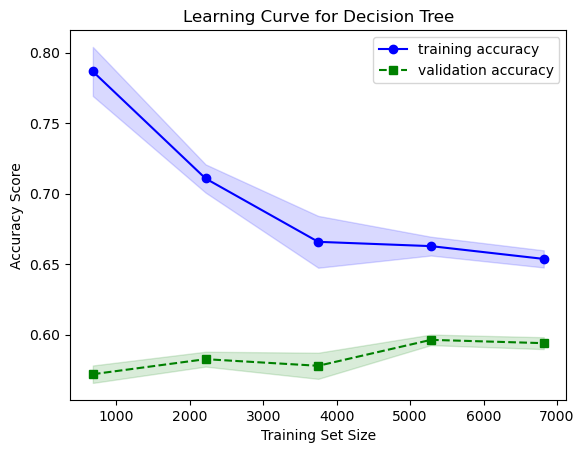

In [65]:
decision_grid_learn(X_train4,y_train4,X_val4,y_val4)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'criterion': 'gini', 'max_depth': 100}
0.6103830725808602
Accuracy:  0.5949960906958561
              precision    recall  f1-score   support

           0       0.53      0.38      0.44       542
           1       0.62      0.75      0.68       737

    accuracy                           0.59      1279
   macro avg       0.58      0.57      0.56      1279
weighted avg       0.58      0.59      0.58      1279

[learning_curve] Training set sizes: [ 681 2215 3749 5283 6818]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.0min finished


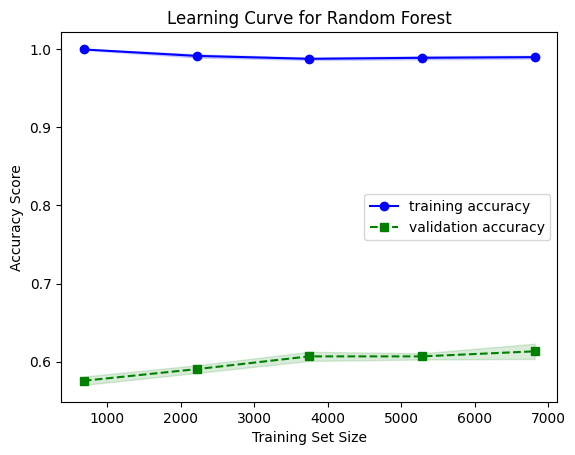

In [67]:
random_grid_learn(X_train1,y_train1,X_val1,y_val1)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'criterion': 'entropy', 'max_depth': 100}
0.6208445988667225
Accuracy:  0.6059421422986708
              precision    recall  f1-score   support

           0       0.55      0.40      0.46       542
           1       0.63      0.76      0.69       737

    accuracy                           0.61      1279
   macro avg       0.59      0.58      0.58      1279
weighted avg       0.60      0.61      0.59      1279

[learning_curve] Training set sizes: [ 681 2215 3749 5283 6818]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.1min finished


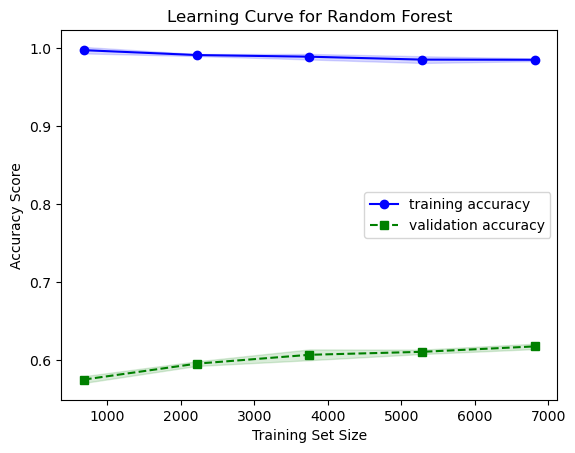

In [67]:
random_grid_learn(X_train2,y_train2,X_val2,y_val2)

Fitting 6 folds for each of 14 candidates, totalling 84 fits


C:\Users\abdus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'criterion': 'gini', 'max_depth': 100}
0.6385414802270777
Accuracy:  0.617670054730258
              precision    recall  f1-score   support

           0       0.56      0.44      0.49       542
           1       0.64      0.75      0.69       737

    accuracy                           0.62      1279
   macro avg       0.60      0.59      0.59      1279
weighted avg       0.61      0.62      0.61      1279

[learning_curve] Training set sizes: [ 852 2769 4687 6605 8523]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.9min finished


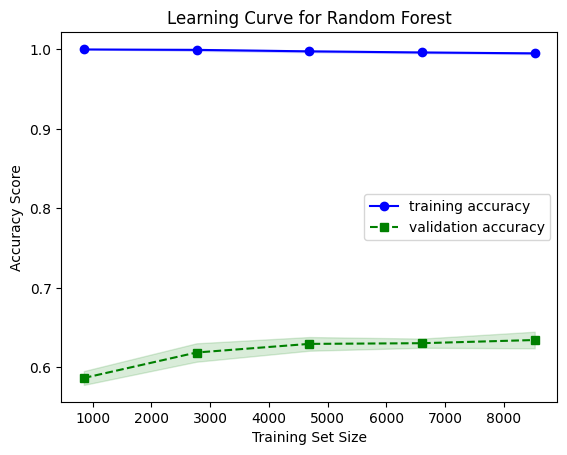

In [90]:
random_grid_learn(X_train3,y_train3,X_val3,y_val3)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'criterion': 'entropy', 'max_depth': 50}
0.6314037908394403
Accuracy:  0.6129788897576232
              precision    recall  f1-score   support

           0       0.56      0.38      0.45       542
           1       0.63      0.79      0.70       737

    accuracy                           0.61      1279
   macro avg       0.60      0.58      0.58      1279
weighted avg       0.60      0.61      0.60      1279

[learning_curve] Training set sizes: [ 681 2215 3749 5283 6818]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   36.6s finished


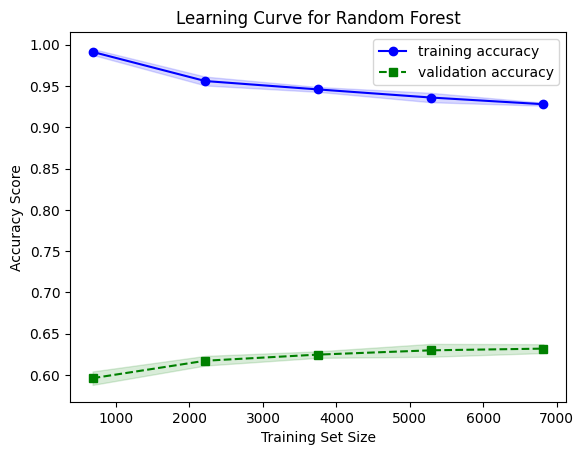

In [69]:
random_grid_learn(X_train4,y_train4,X_val4,y_val4)

In [70]:
ada_grid_learn(X_train1,y_train1,X_val1,y_val1)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\abdus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'learning_rate': 0.5, 'n_estimators': 50}
0.5903410184128207
Accuracy:  0.5895230648944488
              precision    recall  f1-score   support

           0       0.54      0.21      0.31       542
           1       0.60      0.87      0.71       737

    accuracy                           0.59      1279
   macro avg       0.57      0.54      0.51      1279
weighted avg       0.57      0.59      0.54      1279

[learning_curve] Training set sizes: [ 681 2215 3749 5283 6818]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


PicklingError: Could not pickle the task to send it to the workers.

Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'learning_rate': 0.5, 'n_estimators': 50}
0.5924918427932272
Accuracy:  0.581704456606724
              precision    recall  f1-score   support

           0       0.52      0.21      0.30       542
           1       0.60      0.85      0.70       737

    accuracy                           0.58      1279
   macro avg       0.56      0.53      0.50      1279
weighted avg       0.56      0.58      0.53      1279

[learning_curve] Training set sizes: [ 681 2215 3749 5283 6818]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.4min finished


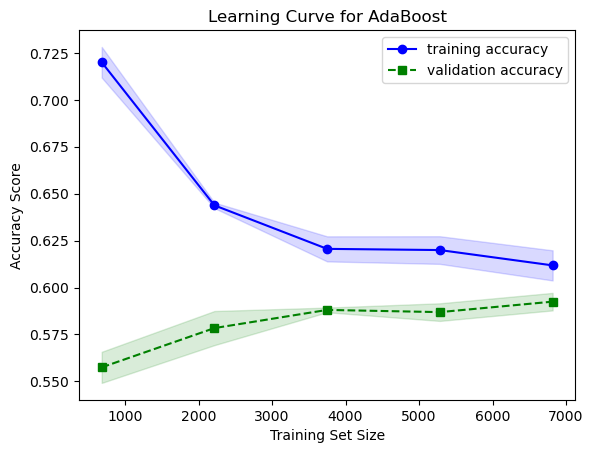

In [71]:
ada_grid_learn(X_train2,y_train2,X_val2,y_val2)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'learning_rate': 0.5, 'n_estimators': 50}
0.6091124723899447
Accuracy:  0.6043784206411259
              precision    recall  f1-score   support

           0       0.55      0.36      0.44       542
           1       0.62      0.78      0.70       737

    accuracy                           0.60      1279
   macro avg       0.59      0.57      0.57      1279
weighted avg       0.59      0.60      0.59      1279

[learning_curve] Training set sizes: [ 681 2215 3749 5283 6818]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.4min finished


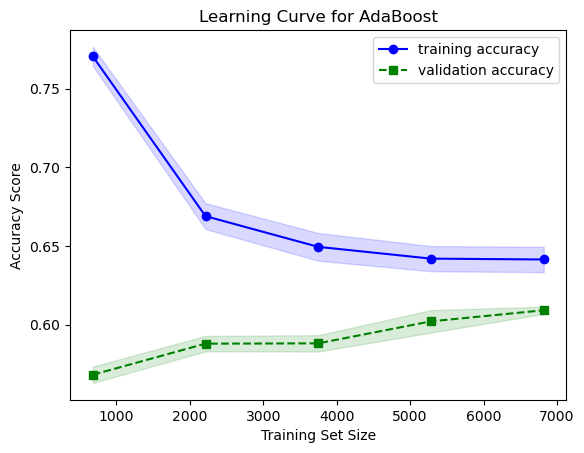

In [72]:
ada_grid_learn(X_train3,y_train3,X_val3,y_val3)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'learning_rate': 0.5, 'n_estimators': 50}
0.610384162215652
Accuracy:  0.6075058639562158
              precision    recall  f1-score   support

           0       0.54      0.48      0.51       542
           1       0.65      0.70      0.67       737

    accuracy                           0.61      1279
   macro avg       0.59      0.59      0.59      1279
weighted avg       0.60      0.61      0.60      1279

[learning_curve] Training set sizes: [ 681 2215 3749 5283 6818]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.1min finished


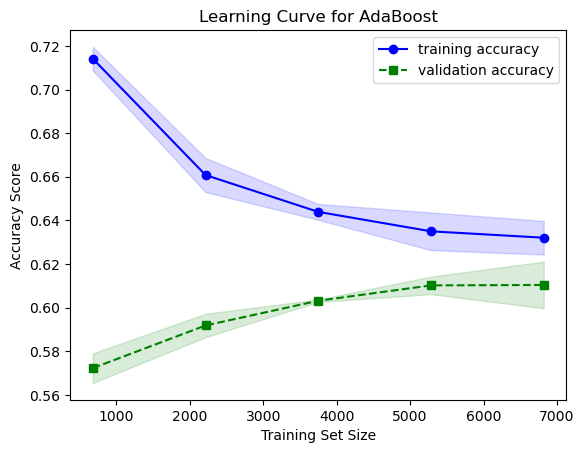

In [73]:
ada_grid_learn(X_train4,y_train4,X_val4,y_val4)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'C': 1, 'kernel': 'rbf'}
0.6212368673917327
Accuracy:  0.5934323690383112
              precision    recall  f1-score   support

           0       0.53      0.39      0.45       542
           1       0.62      0.74      0.68       737

    accuracy                           0.59      1279
   macro avg       0.58      0.57      0.56      1279
weighted avg       0.58      0.59      0.58      1279

[learning_curve] Training set sizes: [ 681 2215 3749 5283 6818]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  9.2min finished


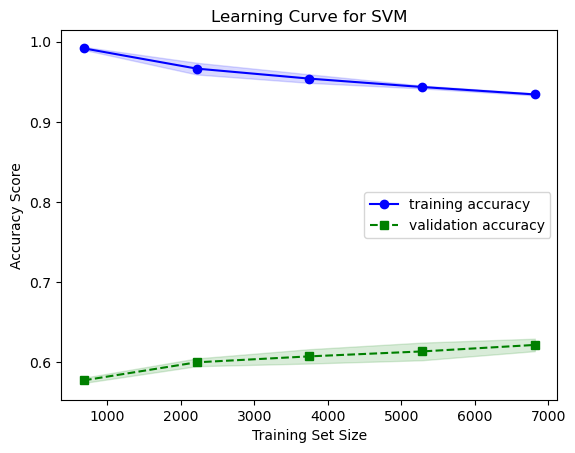

In [74]:
svm_grid_learn(X_train1,y_train1,X_val1,y_val1)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'C': 1, 'kernel': 'rbf'}
0.6226051619441035
Accuracy:  0.5840500390930414
              precision    recall  f1-score   support

           0       0.51      0.38      0.44       542
           1       0.62      0.73      0.67       737

    accuracy                           0.58      1279
   macro avg       0.56      0.56      0.55      1279
weighted avg       0.57      0.58      0.57      1279

[learning_curve] Training set sizes: [ 681 2215 3749 5283 6818]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  8.8min finished


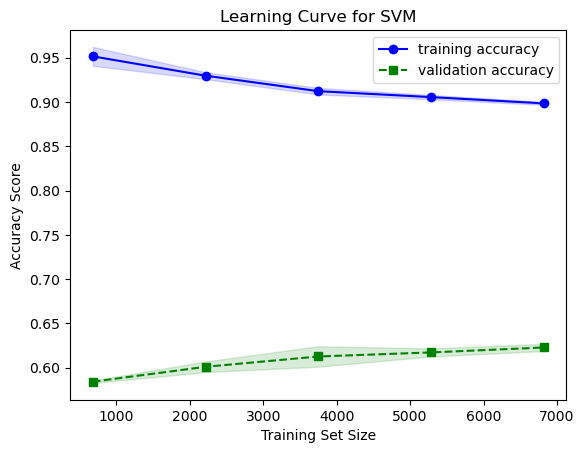

In [75]:
svm_grid_learn(X_train2,y_train2,X_val2,y_val2)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
{'C': 100, 'kernel': 'rbf'}
0.5581724759972094
Accuracy:  0.5832681782642689
              precision    recall  f1-score   support

           0       0.52      0.19      0.28       542
           1       0.59      0.87      0.71       737

    accuracy                           0.58      1279
   macro avg       0.56      0.53      0.49      1279
weighted avg       0.56      0.58      0.53      1279

[learning_curve] Training set sizes: [ 681 2215 3749 5283 6818]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  9.6min finished


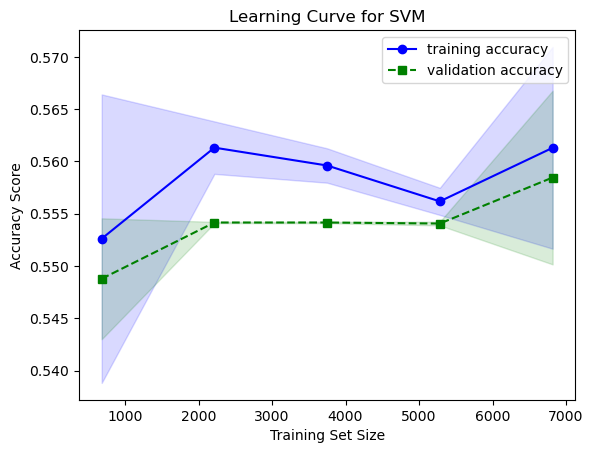

In [37]:
svm_grid_learn(X_train3,y_train3,X_val3,y_val3)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
{'C': 100, 'kernel': 'rbf'}
0.5607142785456357
Accuracy:  0.5809225957779516
              precision    recall  f1-score   support

           0       0.52      0.19      0.28       542
           1       0.59      0.87      0.70       737

    accuracy                           0.58      1279
   macro avg       0.55      0.53      0.49      1279
weighted avg       0.56      0.58      0.52      1279

[learning_curve] Training set sizes: [ 681 2215 3749 5283 6818]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  7.5min finished


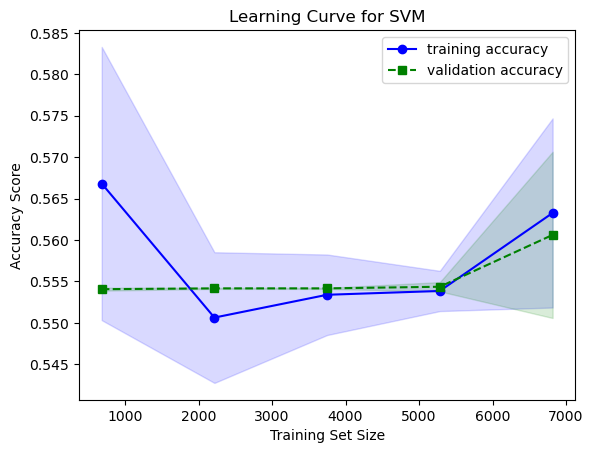

In [38]:
svm_grid_learn(X_train4,y_train4,X_val4,y_val4)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'activation': 'logistic'}
0.6104814264581107
Accuracy:  0.584831899921814
              precision    recall  f1-score   support

           0       0.51      0.42      0.46       542
           1       0.62      0.71      0.66       737

    accuracy                           0.58      1279
   macro avg       0.57      0.56      0.56      1279
weighted avg       0.58      0.58      0.58      1279



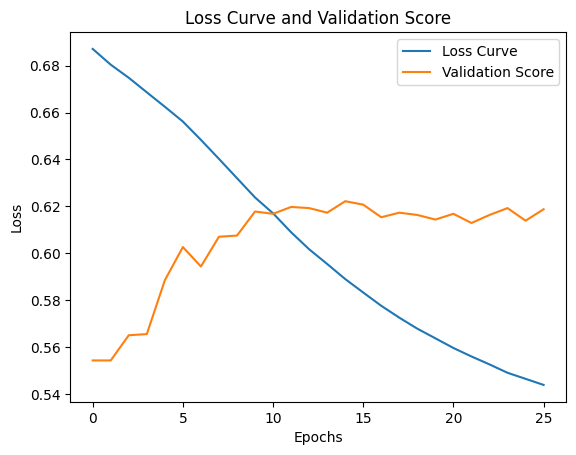

In [71]:
mlp_grid_learn(X_train1,y_train1,X_val1,y_val1)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'activation': 'logistic'}
0.6098946581227829
Accuracy:  0.581704456606724
              precision    recall  f1-score   support

           0       0.51      0.38      0.44       542
           1       0.62      0.73      0.67       737

    accuracy                           0.58      1279
   macro avg       0.56      0.56      0.55      1279
weighted avg       0.57      0.58      0.57      1279



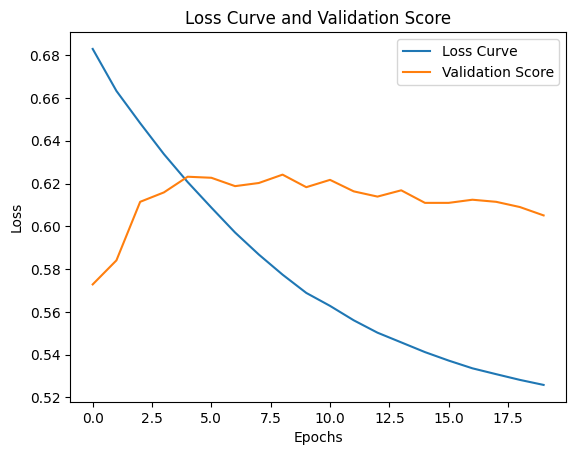

In [72]:
mlp_grid_learn(X_train2,y_train2,X_val2,y_val2)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'activation': 'relu'}
0.620063244697278
Accuracy:  0.5676309616888194
              precision    recall  f1-score   support

           0       0.49      0.62      0.55       542
           1       0.65      0.53      0.58       737

    accuracy                           0.57      1279
   macro avg       0.57      0.57      0.57      1279
weighted avg       0.59      0.57      0.57      1279



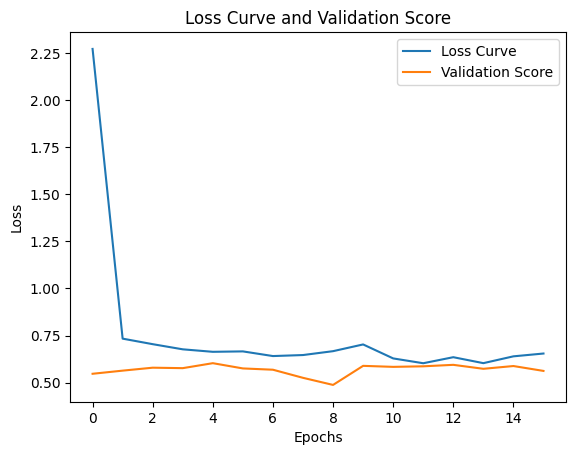

In [73]:
mlp_grid_learn(X_train3,y_train3,X_val3,y_val3)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'activation': 'relu'}
0.6152730094307891
Accuracy:  0.581704456606724
              precision    recall  f1-score   support

           0       0.51      0.35      0.41       542
           1       0.61      0.76      0.68       737

    accuracy                           0.58      1279
   macro avg       0.56      0.55      0.54      1279
weighted avg       0.57      0.58      0.56      1279



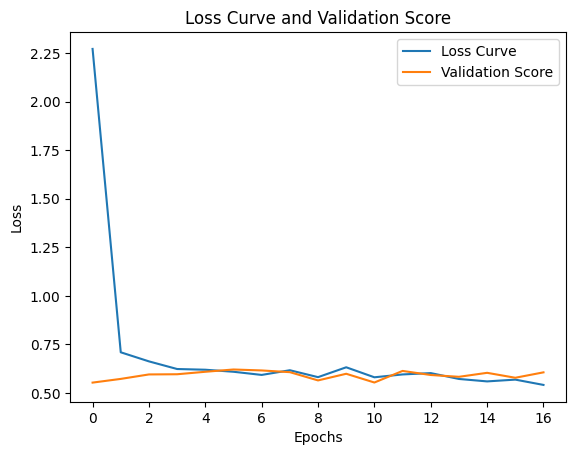

In [74]:
mlp_grid_learn(X_train4,y_train4,X_val4,y_val4)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'activation': 'logistic'}
0.6038327043559871
Accuracy:  0.5770132916340891
              precision    recall  f1-score   support

           0       0.50      0.32      0.39       542
           1       0.61      0.76      0.68       737

    accuracy                           0.58      1279
   macro avg       0.55      0.54      0.53      1279
weighted avg       0.56      0.58      0.56      1279



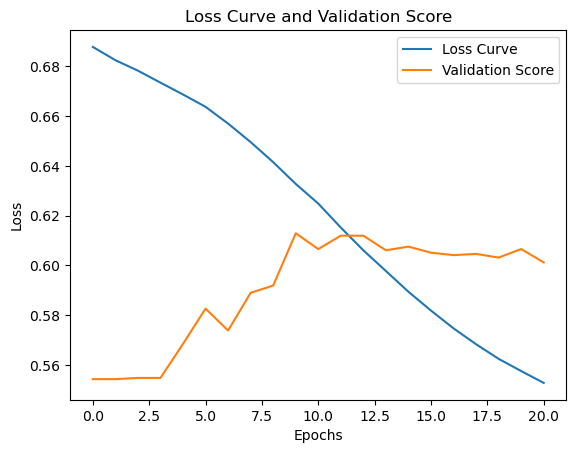

In [47]:
mlp_pca_grid_learn(X_train1,y_train1,X_val1,y_val1)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'activation': 'logistic'}
0.6032457352984609
Accuracy:  0.5942142298670836
              precision    recall  f1-score   support

           0       0.53      0.36      0.43       542
           1       0.62      0.77      0.69       737

    accuracy                           0.59      1279
   macro avg       0.58      0.56      0.56      1279
weighted avg       0.58      0.59      0.58      1279



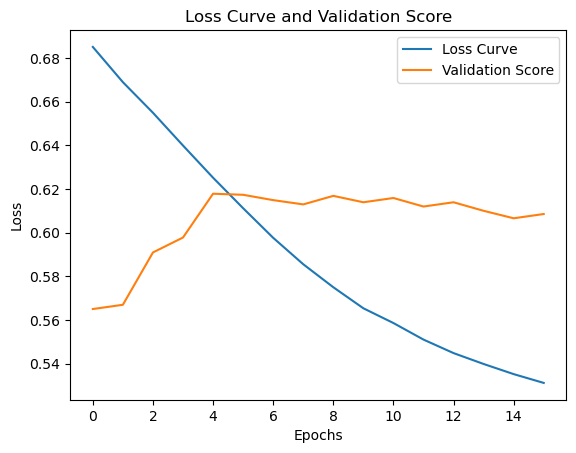

In [48]:
mlp_pca_grid_learn(X_train2,y_train2,X_val2,y_val2)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'activation': 'relu'}
0.6014874375144628
Accuracy:  0.5793588741204065
              precision    recall  f1-score   support

           0       0.50      0.45      0.48       542
           1       0.63      0.67      0.65       737

    accuracy                           0.58      1279
   macro avg       0.56      0.56      0.56      1279
weighted avg       0.57      0.58      0.58      1279



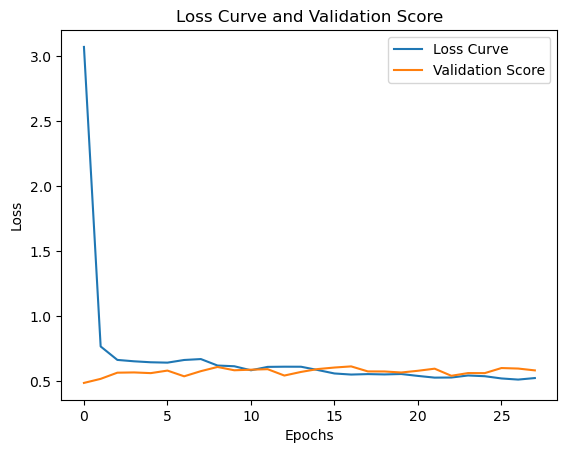

In [49]:
mlp_pca_grid_learn(X_train3,y_train3,X_val3,y_val3)

Fitting 6 folds for each of 2 candidates, totalling 12 fits
{'activation': 'logistic'}
0.622214190978389
Accuracy:  0.6012509773260359
              precision    recall  f1-score   support

           0       0.54      0.37      0.44       542
           1       0.63      0.77      0.69       737

    accuracy                           0.60      1279
   macro avg       0.58      0.57      0.57      1279
weighted avg       0.59      0.60      0.58      1279



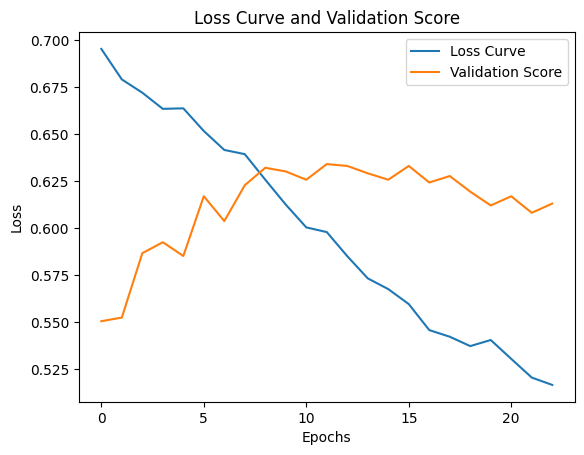

In [84]:
mlp_pca_grid_learn(X_train4,y_train4,X_val4,y_val4)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'activation': 'relu'}
0.5520147203925437
Accuracy:  0.5762314308053167
              precision    recall  f1-score   support

           0       0.50      0.03      0.06       542
           1       0.58      0.98      0.73       737

    accuracy                           0.58      1279
   macro avg       0.54      0.50      0.39      1279
weighted avg       0.55      0.58      0.44      1279



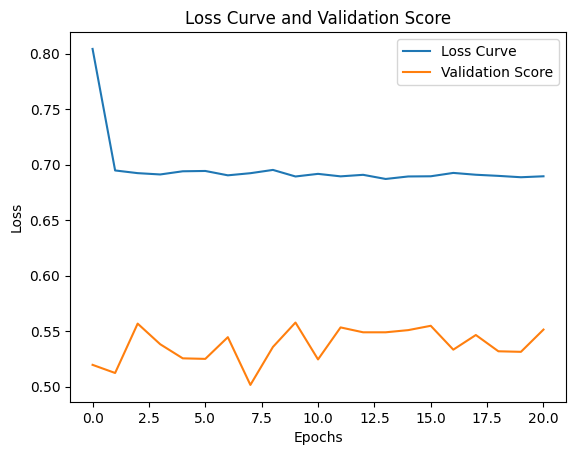

In [75]:
mlp_tsne_grid_learn(X_train1,y_train1,X_val1,y_val1)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'activation': 'logistic'}
0.556218445395103
Accuracy:  0.5809225957779516
              precision    recall  f1-score   support

           0       0.52      0.18      0.27       542
           1       0.59      0.88      0.71       737

    accuracy                           0.58      1279
   macro avg       0.55      0.53      0.49      1279
weighted avg       0.56      0.58      0.52      1279



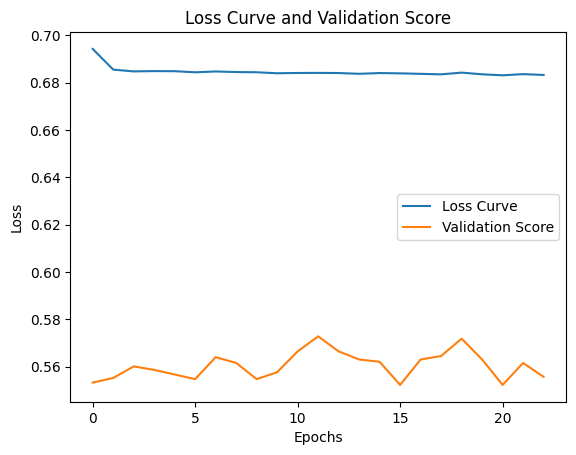

In [76]:
mlp_tsne_grid_learn(X_train2,y_train2,X_val2,y_val2)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'activation': 'relu'}
0.5658007224278668
Accuracy:  0.5754495699765442
              precision    recall  f1-score   support

           0       0.50      0.33      0.40       542
           1       0.61      0.75      0.67       737

    accuracy                           0.58      1279
   macro avg       0.55      0.54      0.54      1279
weighted avg       0.56      0.58      0.56      1279



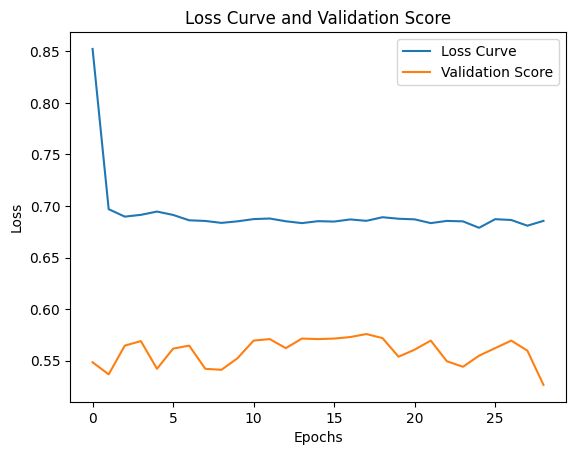

In [77]:
mlp_tsne_grid_learn(X_train3,y_train3,X_val3,y_val3)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'activation': 'logistic'}
0.559249149869803
Accuracy:  0.5590304925723222
              precision    recall  f1-score   support

           0       0.45      0.18      0.26       542
           1       0.58      0.83      0.69       737

    accuracy                           0.56      1279
   macro avg       0.52      0.51      0.47      1279
weighted avg       0.53      0.56      0.51      1279



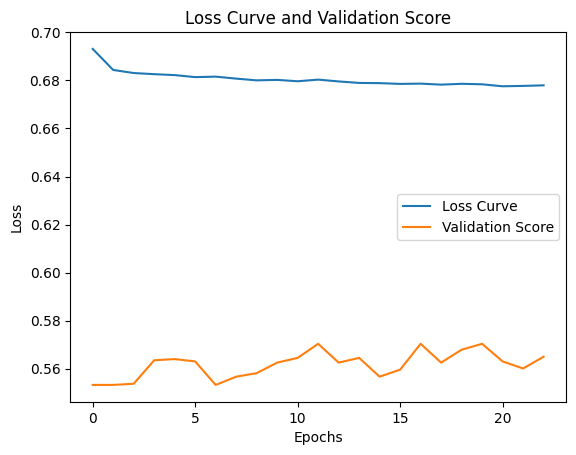

In [78]:
mlp_tsne_grid_learn(X_train4,y_train4,X_val4,y_val4)